In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 1. Load dataset
df = pd.read_csv("music_dataset.csv")

In [3]:
df.head(2)

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.00000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.00421,0.3570,0.693,99.972,162600


In [4]:
df.tail(2)

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
32831,2m69mhnfQ1Oq6lGtXuYhgX,Only For You - Maor Levi Remix,Mat Zo,15,1fGrOkHnHJcStl14zNx8Jy,Only For You (Remixes),2014-01-01,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,2,-3.361,1,0.1090,0.007920,0.127,0.343,0.3080,128.008,367432
32832,29zWqhca3zt5NsckZqDf6c,Typhoon - Original Mix,Julian Calor,27,0X3mUOm6MhxR7PzxG95rAo,Typhoon/Storm,2014-03-03,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,5,-4.571,0,0.0385,0.000133,0.341,0.742,0.0894,127.984,337500


In [5]:
# 2. Check for missing values
df = df[['playlist_genre', 'danceability', 'energy', 'tempo', 'track_popularity']].dropna()



In [6]:
df[['playlist_genre', 'danceability', 'energy', 'tempo', 'track_popularity']]

,playlist_genre,danceability,energy,tempo,track_popularity
0,pop,0.748,0.916,122.036,66
1,pop,0.726,0.815,99.972,67
2,pop,0.675,0.931,124.008,70
3,pop,0.718,0.930,121.956,60
4,pop,0.650,0.833,123.976,69
...,...,...,...,...,...
32828,edm,0.428,0.922,128.170,42
32829,edm,0.522,0.786,128.041,20
32830,edm,0.529,0.821,127.989,14
32831,edm,0.626,0.888,128.008,15


In [7]:
# 3. Encode target
le = LabelEncoder()
df['genre_encoded'] = le.fit_transform(df['playlist_genre'])


In [8]:
# 4. Define X and y
X = df[['danceability', 'energy', 'tempo', 'track_popularity']]
y = df['genre_encoded']


In [9]:
# 5. Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [10]:

# 6. Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [11]:
# 7. Train KNN
knn = KNeighborsClassifier(n_neighbors=206)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=206)

In [12]:
# 8. Predict on test set
y_pred = knn.predict(X_test)

In [13]:
# 9. Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.4245469773107964


In [14]:
# 6. PCA for 2D visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

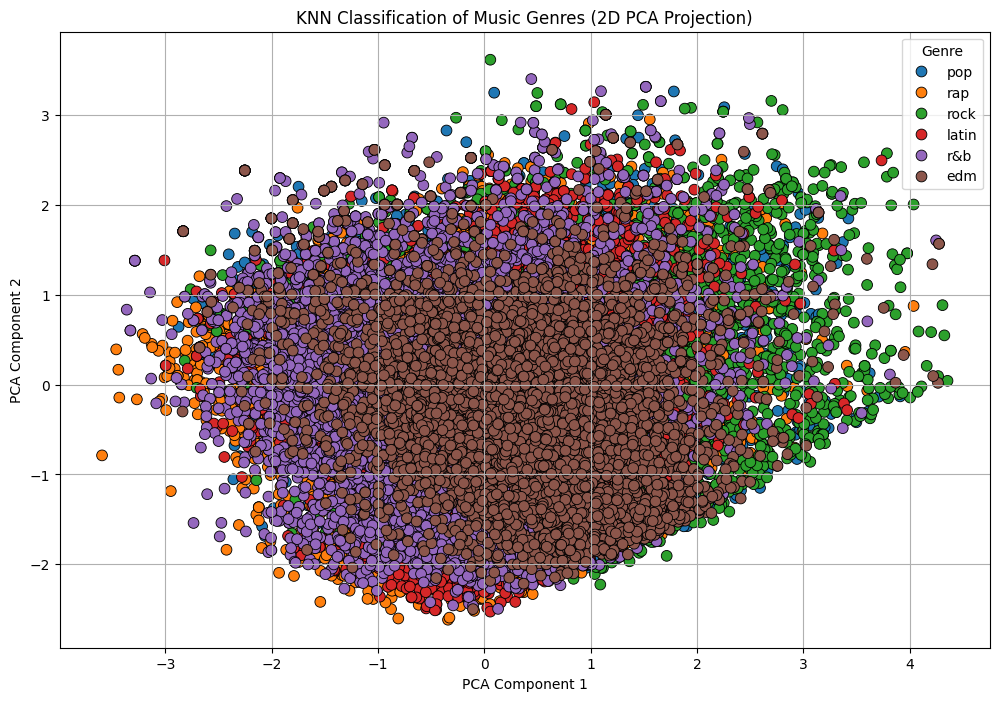

In [17]:
# 9. Plotting
plt.figure(figsize=(12, 8))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['playlist_genre'], s=60, edgecolor='k')
plt.title("KNN Classification of Music Genres (2D PCA Projection)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title='Genre')
plt.grid(True)
plt.show()